## Data Analytics - Lab 2 - Intro to stan
<br>
Jan Pomykacz<br>
Nr. albumu: 401623<br>
Grupa: czwartek, 9:30

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

F = len("Jan")
L = len("Pomykacz")

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exercise 1 - generated quantities

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


array([[<AxesSubplot:title={'center':'lambda'}>,
        <AxesSubplot:title={'center':'y_sim[1]'}>],
       [<AxesSubplot:title={'center':'y_sim[2]'}>,
        <AxesSubplot:title={'center':'y_sim[3]'}>]], dtype=object)

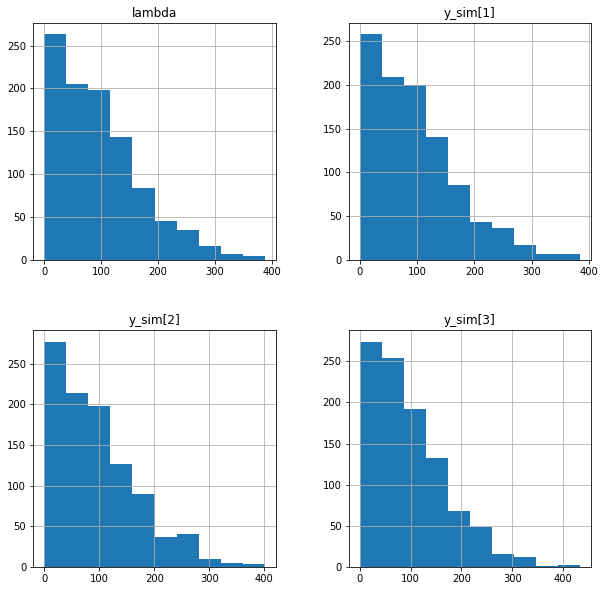

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()

df.hist(list(df.columns[2:]), figsize=(10,10))

### Excercise 2 - constraints on the data

In [16]:
# Ex. 2

# with this code we can have any number of data points (must be >=0 and integer), outputs must be same length vector of 1s and 0s.
# we cannot input other values into 'y' other than {0,1} because bernoullli distribution is a binary one
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':3, 'y':[0, 1, 1]})

# with this code only difference seems to be that we cannot input N=0 with corresponding empty vector
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':3, 'y':[1,0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### Excercise 3 - constraints on the parameters

In [4]:
# unconstrained parameters
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███       | 00:00 Iteration: 1900 / 7000 [ 27%]  (Sampling)




chain 1 |███▉      | 00:00 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:01 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |██████▉   | 00:02 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████▏  | 00:02 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |███████▌  | 00:02 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |█████


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DataAnalytics_lab/lab2/samples/code_4-20230318153131_1.csv, /home/DataAnalytics_lab/lab2/samples/code_4-20230318153131_2.csv, /home/DataAnalytics_lab/lab2/samples/code_4-20230318153131_3.csv, /home/DataAnalytics_lab/lab2/samples/code_4-20230318153131_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

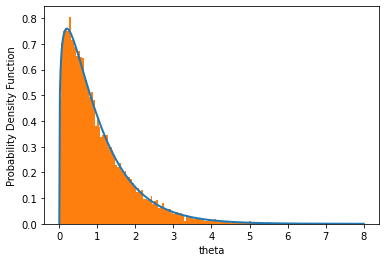

In [5]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
plt.hist(out_gamma1.stan_variable("theta"), bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [6]:
# constrained variable
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |███▍      | 00:01 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▊     | 00:01 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DataAnalytics_lab/lab2/samples/code_5-20230318153136_1.csv, /home/DataAnalytics_lab/lab2/samples/code_5-20230318153136_2.csv, /home/DataAnalytics_lab/lab2/samples/code_5-20230318153136_3.csv, /home/DataAnalytics_lab/lab2/samples/code_5-20230318153136_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

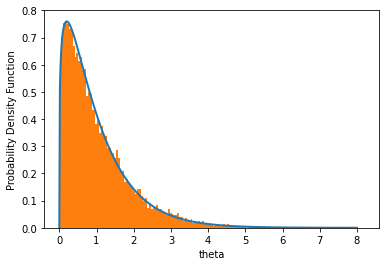

In [7]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
plt.hist(out_gamma2.stan_variable("theta"), bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In unconstrained parameters example divergent sampler transitions were around 40%. For constrained example it was around 0.01%.

### Excercise 4 - functions and different functionalities of stan

In [17]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:compiling stan file /home/DataAnalytics_lab/lab2/code_6.stan to exe file /home/DataAnalytics_lab/lab2/code_6
INFO:cmdstanpy:compiled model executable: /home/DataAnalytics_lab/lab2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DataAnalytics_lab/lab2/code_6.hpp /home/DataAnalytics_lab/lab2/code_6.stan
Warning in '/home/DataAnalytics_lab/lab2/code_6.stan', line 2, column 46: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/DataAnalytics_lab/lab2/code_6.stan', line 2, column 58: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/DataAnalytics_lab/lab2/co


INFO:cmdstanpy:CmdStan done processing.


In [25]:
print("Std found: ", float(tunes.draws_pd()["sigma"]))

Std found:  2.13523


### Excercise 5 - different methods of defining models

In [28]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 21371337
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


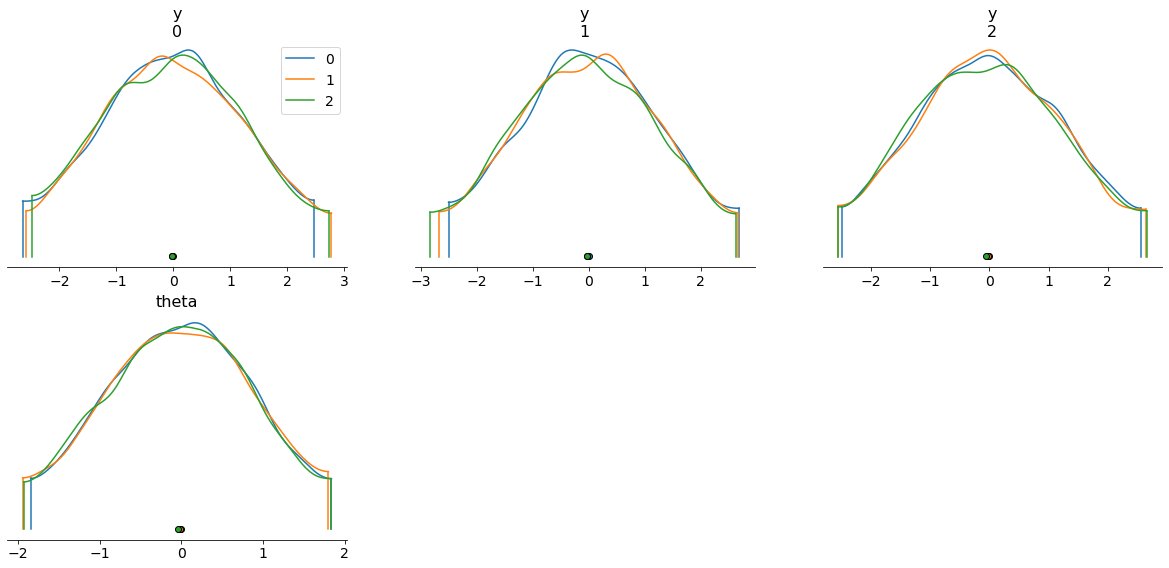

In [29]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing


(array([  6.,  12.,  33.,  75., 115., 210., 290., 409., 484., 506., 499.,
        467., 323., 273., 137.,  88.,  45.,  17.,   6.,   5.]),
 array([-3.58894  , -3.2201085, -2.851277 , -2.4824455, -2.113614 ,
        -1.7447825, -1.375951 , -1.0071195, -0.638288 , -0.2694565,
         0.099375 ,  0.4682065,  0.837038 ,  1.2058695,  1.574701 ,
         1.9435325,  2.312364 ,  2.6811955,  3.050027 ,  3.4188585,
         3.78769  ]),
 <BarContainer object of 20 artists>)

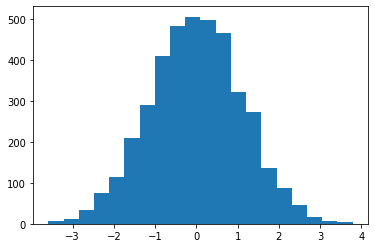

In [36]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
mean_of_y_df = mean_of_y.draws_pd()
plt.hist(mean_of_y_df, bins=20)